In [59]:
import time
import pandas as pd
import pandas as pd
from scipy.spatial import cKDTree
from tqdm import tqdm
import math
#from geopy.geocoders import Nominatim
#from geopy.exc import GeopyError

In [50]:
df = pd.read_csv("uber_cleaned.csv")

In [61]:
print(df.head())

         Id  fare_amount      pickup_datetime  passenger_count  \
0  24238194          7.5  2015-05-07 19:52:06                1   
1  27835199          7.7  2009-07-17 20:04:56                1   
2  44984355         12.9  2009-08-24 21:45:00                1   
3  25894730          5.3  2009-06-26 08:22:21                3   
4  17610152         16.0  2014-08-28 17:47:00                5   

   distance_miles pickup_statecode pickup_statename     pickup_city  \
0        1.045980               NY         New York        New York   
1        1.527093               NY         New York        New York   
2        3.129495               NY         New York        New York   
3        1.032534               NJ       New Jersey  Cliffside Park   
4        2.780947               NY         New York       Sunnyside   

  dropoff_statecode dropoff_statename      dropoff_city pickup_county  \
0                NY          New York          New York      New York   
1                NY          N

In [63]:
print(df.dtypes)

Id                     int64
fare_amount          float64
pickup_datetime       object
passenger_count        int64
distance_miles       float64
pickup_statecode      object
pickup_statename      object
pickup_city           object
dropoff_statecode     object
dropoff_statename     object
dropoff_city          object
pickup_county         object
dropoff_county        object
dtype: object


In [60]:
#print(df.head())
# print(df.dtypes)

In [54]:
#cleaning the uber table
# Ensuring data types are correct
df['Id'] = df['Id'].astype(int)
df['fare_amount'] = df['fare_amount'].astype(float)
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime']).astype(
    str)  # Convert to ISO format string
df['passenger_count'] = df['passenger_count'].astype(int)
df['distance_miles'] = df['distance_miles'].astype(float)
# Other columns should be strings
df['pickup_statecode'] = df['pickup_statecode'].astype(str)
df['pickup_statename'] = df['pickup_statename'].astype(str)
df['pickup_city'] = df['pickup_city'].astype(str)
df['dropoff_statecode'] = df['dropoff_statecode'].astype(str)
df['dropoff_statename'] = df['dropoff_statename'].astype(str)
df['dropoff_city'] = df['dropoff_city'].astype(str)
df['pickup_county'] = df['pickup_county'].astype(str)
df['dropoff_county'] = df['dropoff_county'].astype(str)

In [57]:
#print(df.dtypes)

In [5]:
#deletign the rows from table with latitudes and longitudes out of range
min_pickup_latitude = df['pickup_latitude'].min()
max_pickup_latitude = df['pickup_latitude'].max()
min_pickup_longitude = df['pickup_longitude'].min()
max_pickup_longitude = df['pickup_longitude'].max()

In [6]:
print(min_pickup_latitude)
print(max_pickup_longitude)
print(min_pickup_longitude)
print(max_pickup_longitude)

-74.01551500000001
40.808425
-93.824668
40.808425


In [7]:
lat_min, lat_max = -90, 90
lon_min, lon_max = -180, 180

In [9]:
df = df[
    (df['pickup_latitude'] >= lat_min) & (df['pickup_latitude'] <= lat_max) &
    (df['pickup_longitude'] >= lon_min) & (df['pickup_longitude'] <= lon_max) &
    (df['dropoff_latitude'] >= lat_min) & (df['dropoff_latitude'] <= lat_max) &
    (df['dropoff_longitude'] >= lon_min) & (df['dropoff_longitude'] <= lon_max)
]

In [10]:
print(len(df))

199987


In [11]:
min_pickup_latitude = df['pickup_latitude'].min()
max_pickup_latitude = df['pickup_latitude'].max()
min_pickup_longitude = df['pickup_longitude'].min()
max_pickup_longitude = df['pickup_longitude'].max()

print(min_pickup_latitude)
print(max_pickup_longitude)
print(min_pickup_longitude)
print(max_pickup_longitude)

-74.01551500000001
40.808425
-93.824668
40.808425


In [12]:
print(len(df))

199987


In [3]:
unique_values = set(df['pickup_latitude'])

In [13]:
pickup_latitudes = df['pickup_latitude']
pickup_longitudes = df['pickup_longitude']

In [14]:
#verifying that values are within the range
min_pickup_latitude = df['pickup_latitude'].min()
max_pickup_latitude = df['pickup_latitude'].max()
min_pickup_longitude = df['pickup_longitude'].min()
max_pickup_longitude = df['pickup_longitude'].max()

print("Min pickup_latitude:", min_pickup_latitude)
print("Max pickup_latitude:", max_pickup_latitude)
print("Min pickup_longitude:", min_pickup_longitude)
print("Max pickup_longitude:", max_pickup_longitude)

# Calculate min and max for dropoff_latitude and dropoff_longitude
min_dropoff_latitude = df['dropoff_latitude'].min()
max_dropoff_latitude = df['dropoff_latitude'].max()
min_dropoff_longitude = df['dropoff_longitude'].min()
max_dropoff_longitude = df['dropoff_longitude'].max()

# Print the results
print("Min dropoff_latitude:", min_dropoff_latitude)
print("Max dropoff_latitude:", max_dropoff_latitude)
print("Min dropoff_longitude:", min_dropoff_longitude)
print("Max dropoff_longitude:", max_dropoff_longitude)


Min pickup_latitude: -74.01551500000001
Max pickup_latitude: 48.01876
Min pickup_longitude: -93.824668
Max pickup_longitude: 40.808425
Min dropoff_latitude: -74.01575
Max dropoff_latitude: 45.031597999999995
Min dropoff_longitude: -75.458978633981
Max dropoff_longitude: 40.831932


In [16]:
import lamini


lamini.api_key = "1ac6f38b3e7f498fa2c3ed6ea9df68b9"
llm = lamini.Lamini(model_name="meta-llama/Meta-Llama-3-8B-Instruct")

INFO:lamini.api.lamini:Using 3.10 InferenceQueue Interface


In [17]:
#print(llm.generate("How are you?", max_new_tokens = 30))

In [18]:
def make_llama_3_prompt(user, system=""):
   system_prompt = ""
   if system != "":
       system_prompt = (
           f"<|start_header_id|>system<|end_header_id|>\n\n{system}<|eot_id|>"
       )
   return f"<|begin_of_text|>{system_prompt}<|start_header_id|>user<|end_header_id|>\n\n{user}<|eot_id|><|start_header_id|>assistant<|end_header_id|>\n\n"

In [19]:
def make_prompt(question):
    system = "You are a geographic location specialist with extensive experience in converting latitude and longitude coordinates into precise location information.\n"
    system += "Understand the provided latitude and longitude values and generate a descriptive location, including city and state if possible.\n"
    system += "Consider the latitude and longitude provided in the question and use your knowledge to infer the location accurately.\n"
    system += "Just output the location in the json format.\n"
    return make_llama_3_prompt(question, system)


In [20]:
generated_locations = []

In [21]:
print(len(df))

199987


In [ ]:
# async method for lamini call to generate location of a place base on the latitude and longitude
# the async inference calls are very slow and not practical for a table with 200 thousand rows
for index in range(len(df)):
    latitude = pickup_latitudes[index]
    longitude = pickup_longitudes[index]
    question = f"Latitude is: {latitude} and Longitude is: {longitude}\n"
    prompt = make_prompt(question)
    result = llm.generate(prompt, output_type = {
        "location": "str"
    })
    generated_locations.append(result['location'])

In [16]:
"""
This script performs the following tasks:
1. Loads coordinates and location data from CSV files into DataFrames.
2. Initializes a KDTree for efficient spatial queries using latitude and longitude.
3. Defines a function to map coordinates to the nearest location and retrieve state code, state name, city, and county.
4. Applies this mapping function to both pickup and dropoff coordinates, adding new columns for the nearest location details.
5. Saves the updated DataFrame with the new location information to a CSV file.
"""

# Loading the DataFrames from CSV files
df_coordinates = pd.read_csv('uber_updated.csv')  
df_locations = pd.read_csv('us_cities.csv')      

# Creating a KDTree for the locations DataFrame
tree = cKDTree(df_locations[['LATITUDE', 'LONGITUDE']].values)

# Define a function to map coordinates to the nearest location and return multiple columns
def map_to_location(lat, lon, tree, df_locations):
    distance, index = tree.query([lat, lon])
    location = df_locations.iloc[index]
    return location['STATE_CODE'], location['STATE_NAME'], location['CITY'], location['COUNTY']

# Apply the function to the pickup coordinates DataFrame with a progress bar
tqdm.pandas(desc="Mapping Pickup Coordinates")
df_coordinates[['pickup_statecode', 'pickup_statename', 'pickup_city', 'pickup_county']] = df_coordinates.progress_apply(
    lambda row: pd.Series(map_to_location(row['pickup_latitude'], row['pickup_longitude'], tree, df_locations)),
    axis=1
)

# Apply the function to the dropoff coordinates DataFrame with a progress bar
tqdm.pandas(desc="Mapping Dropoff Coordinates")
df_coordinates[['dropoff_statecode', 'dropoff_statename', 'dropoff_city', 'dropoff_county']] = df_coordinates.progress_apply(
    lambda row: pd.Series(map_to_location(row['dropoff_latitude'], row['dropoff_longitude'], tree, df_locations)),
    axis=1
)

# Save the updated DataFrame back to a new CSV file
df_coordinates.to_csv('uber_updated.csv', index=False)

print("Mapping completed and saved to 'uber_updated_with_locations_and_counties.csv'")

Mapping Dropoff Coordinates: 100%|███| 199987/199987 [00:14<00:00, 14140.78it/s]


Mapping completed and saved to 'uber_updated_with_locations_and_counties.csv'


In [14]:
print(df.head())

         Id  fare_amount      pickup_datetime  pickup_longitude  \
0  24238194          7.5  2015-05-07 19:52:06        -73.999817   
1  27835199          7.7  2009-07-17 20:04:56        -73.994355   
2  44984355         12.9  2009-08-24 21:45:00        -74.005043   
3  25894730          5.3  2009-06-26 08:22:21        -73.976124   
4  17610152         16.0  2014-08-28 17:47:00        -73.925023   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0        40.738354         -73.999512         40.723217                1   
1        40.728225         -73.994710         40.750325                1   
2        40.740770         -73.962565         40.772647                1   
3        40.790844         -73.965316         40.803349                3   
4        40.744085         -73.973082         40.761247                5   

   distance_miles pickup_statecode pickup_statename     pickup_city  \
0        1.045980               NY         New York        New York  

In [ ]:
# Calculating the distance in miles for the trip using the Haversine formula, based on pickup and dropoff latitudes and longitudes
def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the Earth's surface identified by latitude and longitude coordinates.
    """
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    # Radius of the Earth in kilometers
    R = 3958.8  # Earth radius in kilometers (use 3956.0 for miles)
    
    # Calculate the distance
    distance = R * c
    
    return distance

# Example usage:
pickup_lat = -73.99981689   # Pickup latitude (e.g., New York City)
pickup_lon = 40.73835373  # Pickup longitude (e.g., New York City)
dropoff_lat = -73.99951172  # Drop-off latitude (e.g., Los Angeles)
dropoff_lon = 40.72321701  # Drop-off longitude (e.g., Los Angeles)

distance_km = haversine_distance(pickup_lat, pickup_lon, dropoff_lat, dropoff_lon)
print(f"Distance between pickup and drop-off locations: {distance_km:.2f} kilometers")


In [ ]:
# Initialize the geolocator with a user agent
geolocator = Nominatim(user_agent="geoapiExercises")

def get_place_from_coordinates(latitude, longitude, retries=3, delay=1):
    """
    Get the place name from latitude and longitude coordinates.
    
    Parameters:
        latitude (float): Latitude of the location.
        longitude (float): Longitude of the location.
        retries (int): Number of retry attempts in case of failure.
        delay (int): Delay between retry attempts in seconds.
    
    Returns:
        str: Place name or "Unknown" if not found.
    """
    attempt = 0
    while attempt < retries:
        try:
            location = geolocator.reverse((latitude, longitude), exactly_one=True)
            if location and 'address' in location.raw:
                address = location.raw['address']
                # Return the most specific place available
                for key in ['city', 'town', 'village', 'suburb', 'neighborhood']:
                    if key in address:
                        return address[key]
                return address.get('country', 'Unknown')
            return 'Unknown'
        except GeopyError as e:
            print(f"GeopyError: {e}")
        except Exception as e:
            print(f"Error: {e}")
        
        attempt += 1
        time.sleep(delay)  # Wait before retrying

    return 'Error'

# Example usage
latitude = 40.730610
longitude = -73.935242
place_name = get_place_from_coordinates(latitude, longitude)
print(f"Place name: {place_name}")


In [ ]:
# Data Cleaning

In [22]:
print(len(df))

199987


In [23]:
"""
Remove rows from the DataFrame where the 'distance_miles' column has a value of 0
Save the updated DataFrame, which now excludes rows with 0 distance, to the original CSV file
"""

df = df[df['distance_miles'] > 0]
df.to_csv('uber_updated.csv', index=False)

In [11]:
print(len(df))

193665


In [26]:
"""
Remove rows from the DataFrame where 'passenger_count' is 0
Save the updated DataFrame, which now excludes rows with 0 passengers, to the original CSV file
"""

df = df[df['passenger_count'] > 0]
df.to_csv('uber_updated.csv', index=False)

In [6]:
print(len(df))

193665


In [7]:

same_location = (
    (df['pickup_county'] == df['dropoff_county']) &
    (df['pickup_statecode'] == df['dropoff_statecode']) &
    (df['pickup_statename'] == df['dropoff_statename']) &
    (df['pickup_city'] == df['dropoff_city'])
)


df = df[~same_location]

In [8]:
print(len(df))

99473


In [ ]:
#understading the demographics of the data we have

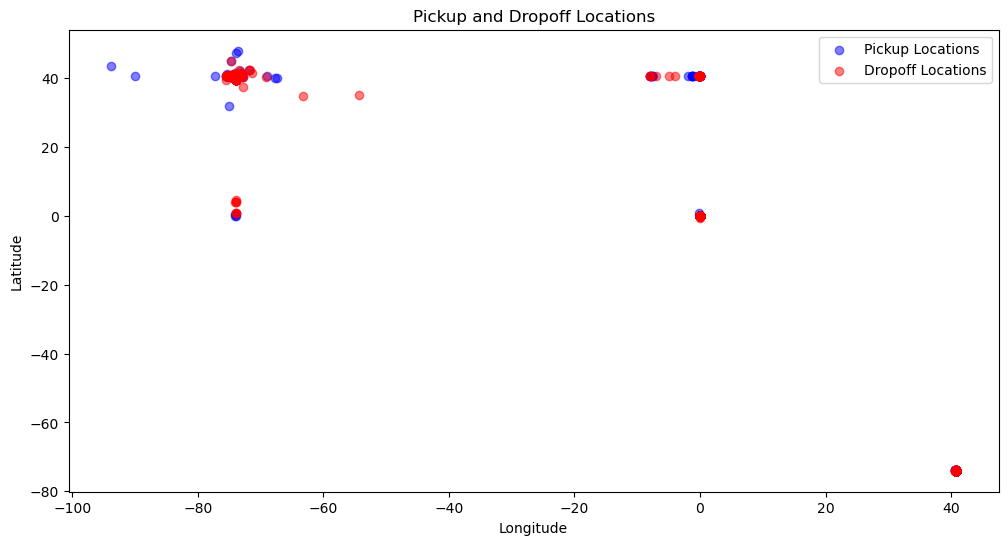

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your DataFrame
# df = pd.read_csv('your_data.csv')  # Replace with your actual data loading method

# Create a new figure with specified size
plt.figure(figsize=(12, 6))

# Plot Pickup Locations as blue dots
plt.scatter(df['pickup_longitude'], df['pickup_latitude'], c='blue', alpha=0.5, label='Pickup Locations')

# Plot Dropoff Locations as red dots
plt.scatter(df['dropoff_longitude'], df['dropoff_latitude'], c='red', alpha=0.5, label='Dropoff Locations')

# Set labels for the x and y axes
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Set the title for the plot
plt.title('Pickup and Dropoff Locations')

# Add a legend to differentiate between pickup and dropoff locations
plt.legend()

# Display the plot
plt.show()


In [38]:
#printing all the unique cities
unique_cities = df['pickup_city'].unique()
print("Unique Pickup Cities:")
print(unique_cities)

Unique Pickup Cities:
['New York' 'Cliffside Park' 'Sunnyside' 'Brooklyn' 'Long Island City'
 'Astoria' 'Bronx' 'South Ozone Park' 'Edgewater' 'West New York'
 'Jersey City' 'East Elmhurst' 'Inwood' 'Culebra' 'North Bergen'
 'Springfield Gardens' 'Elmhurst' 'Woodside' 'Jackson Heights' 'Fairview'
 'Ridgewood' 'Hastings On Hudson' 'Long Branch' 'Eastport' 'Jamaica'
 'Richmond Hill' 'Highlands' 'Mount Vernon' 'Maspeth' 'Forest Hills'
 'Point Lookout' 'Staten Island' 'South Richmond Hill' 'Kew Gardens'
 'Fort Lee' 'Weehawken' 'Flushing' 'Bethlehem' 'Rego Park'
 'Queens Village' 'Breezy Point' 'Larchmont' 'College Point'
 'North Arlington' 'Woodmere' 'Fresh Meadows' 'Valley Stream' 'Hoboken'
 'Orangeburg' 'Englewood Cliffs' 'New Brunswick' 'Corona' 'Ridgefield'
 'Leonia' 'Woodhaven' 'Bronxville' 'Old Greenwich' 'Union City'
 'Hogansburg' 'Carteret' 'Stevenson' 'Ozone Park' 'Bellerose'
 'Middle Village' 'Bath' 'Bloomfield' 'Maplewood' 'Barnegat Light'
 'Pelham' 'Howard Beach' 'Teaneck' 'Sum